In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')
from auxPlots import interpolateData,getContours,saveContours

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 200)

### Load Recast Data

In [2]:
recastData = pd.read_pickle('../Recast/pp2STST_monojet.pcl')
mstop = '$m_{\tilde t}$'
mchi = '$m_{\tilde \chi_1^0}$'

### Get all model points

In [3]:
models = []
mCols = ['Coupling','Mode',mstop,mchi]
for row in recastData[mCols].values:
    m = dict(zip(mCols,row.tolist()))
    if m not in models:
        models.append(m)
print('%i models loaded' %len(models))

206 models loaded


### Get model parameters

In [4]:
parameters = {label : list(set([m[label] for m in models])) for label in mCols}
for k,v in parameters.items():
    if len(v) == 1:
        parameters[k] = v[0]
print(parameters)

textstr = '\n'.join([r'%s = %s' %(k,v) for k,v in parameters.items() if k not in [mstop,mchi]])
print(textstr)

{'Coupling': 'Stop', 'Mode': 'DM+QCDjets', '$m_{\tilde t}$': [800.0, 450.0, 900.0, 550.0, 200.0, 1000.0, 650.0, 300.0, 750.0, 400.0, 850.0, 500.0, 950.0, 600.0, 250.0, 700.0, 350.0], '$m_{\tilde \\chi_1^0}$': [5.0, 525.0, 530.0, 535.0, 540.0, 550.0, 50.0, 575.0, 580.0, 585.0, 590.0, 600.0, 100.0, 625.0, 630.0, 635.0, 640.0, 650.0, 150.0, 675.0, 680.0, 685.0, 175.0, 690.0, 180.0, 185.0, 700.0, 190.0, 200.0, 725.0, 730.0, 735.0, 225.0, 740.0, 230.0, 235.0, 750.0, 240.0, 250.0, 775.0, 780.0, 785.0, 275.0, 790.0, 280.0, 285.0, 800.0, 290.0, 300.0, 825.0, 830.0, 835.0, 325.0, 840.0, 330.0, 335.0, 850.0, 340.0, 350.0, 875.0, 880.0, 885.0, 375.0, 890.0, 380.0, 385.0, 900.0, 390.0, 400.0, 925.0, 930.0, 935.0, 425.0, 940.0, 430.0, 435.0, 950.0, 440.0, 450.0, 975.0, 980.0, 985.0, 475.0, 990.0, 480.0, 485.0, 490.0, 500.0]}
Coupling = Stop
Mode = DM+QCDjets


In [5]:
# Remove duplicated data from other datasets
recastData = recastData[recastData['Data-takingperiod'] == 2017]

In [6]:
lmuData = np.log10(recastData['$\mu^{UL}_{obs}$'])
rValues = 1/((recastData['$\mu^{UL}_{obs}$']))

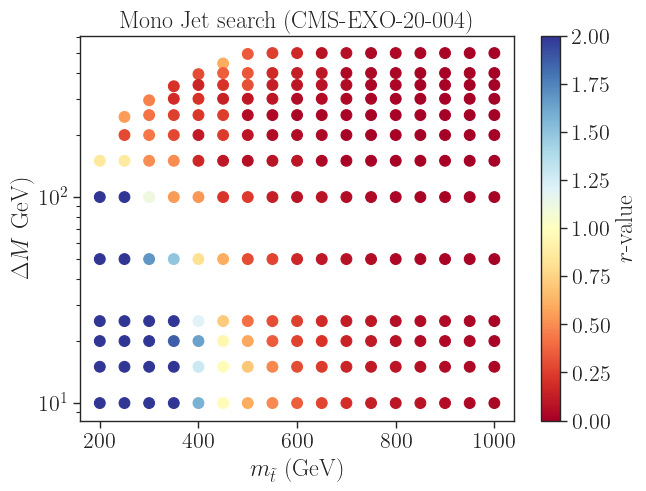

In [7]:
fig = plt.figure(figsize=(7,5))
y = recastData[mstop]-recastData[mchi]
plt.scatter(x=recastData[mstop],y=y,vmin=0.0,vmax=2.0,
            c=rValues,cmap=cm,s=60)
cbar = plt.colorbar(label=r'$r$-value')
plt.xlabel(r'$m_{\tilde t}$ (GeV)')
plt.ylabel(r'$\Delta M$ GeV)')
plt.yscale('log')
# plt.ylim(-10,1000)
# plt.xlim(0,3000)
plt.title('Mono Jet search (CMS-EXO-20-004)')
plt.show()

### Interpolate for a denser grid

In [8]:
# Interpolate to create more points
x = recastData[mstop]
dm = recastData[mstop]-recastData[mchi]
z = rValues
xnew,ynew,znew = interpolateData(x,dm,z)
# Get contours
cValues = sorted([1.,0.8])
contoursDict = getContours(xnew,ynew,znew,cValues)

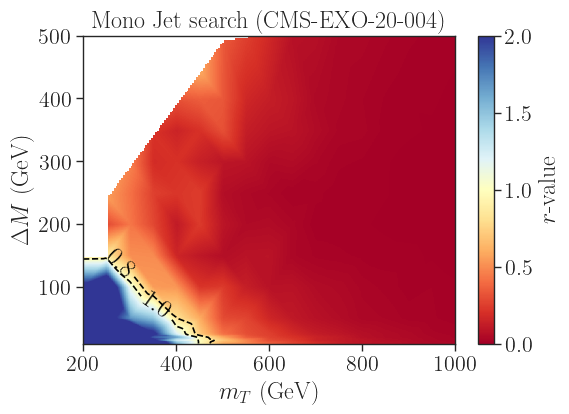

In [9]:
plt.figure(figsize=(6,4))
plt.imshow(znew.T, extent=[x.min(),x.max(), dm.min(), dm.max()], origin='lower',
                  cmap=cm,aspect='auto',vmin=0,vmax=2)
plt.colorbar(label=r'$r$-value')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$\Delta M$ (GeV)')
contours = plt.contour(xnew, ynew, znew, cValues, colors='black',linestyles='dashed')
plt.clabel(contours, inline=True, fontsize=18)
plt.title('Mono Jet search (CMS-EXO-20-004)')
plt.show()

### Save contour curves to text file

In [10]:
fname = 'monojet_curve_sms.csv'
saveContours(contoursDict,fname,header='mST_GeV,deltaM_GeV')

Contours saved to monojet_curve_sms.csv
